<a href="https://colab.research.google.com/github/ChampiChampiAbraham/Curso_Laboratorio_Software_I/blob/master/varios_modelos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema:** 

Construir modelos de aprendizaje automático y entrenarlos, para detectar cáncer de seno. 

Las variables son constituidas como predictores que pueden ser parametrizadas y servir como biomarcadores de cáncer.

Variable respuesta:

1: pacientes saludables.

2: pacientes enfermos.

# **1. Lectura de datos**

In [ ]:
import pandas as pd

data = pd.read_csv('cancer_mamas.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# **2. Exploración de datos.**


In [ ]:
# información de las características
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
# cuantos datos de la característica Clasificación existe?
data["Classification"].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [ ]:
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
# Correlación de variables/características
corr_data = data.corr(method='pearson')
corr_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


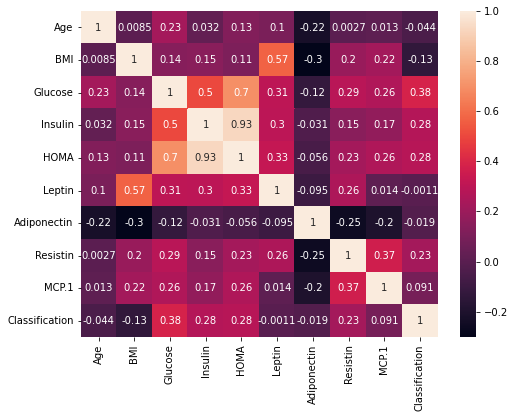

In [ ]:
# grafico de calor de la correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True)
plt.show()

In [ ]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


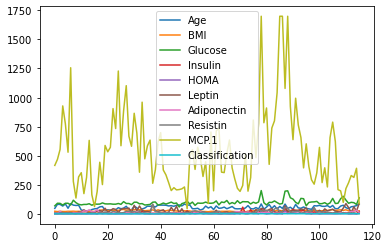

In [ ]:
# grafica de características
data.plot()

# **3. Preprocesamiento**

In [ ]:
# estandarizar el conjunto de datos y volver a graficar


In [ ]:
# dividimos los datos en características de entrada y de salida

X = data.drop("Classification", axis=1)
y = data["Classification"]


In [ ]:
# dividimos en conjunto de entrenamiento (train) y conjunto de prueba (test)
# Los datos de entrenamiento será 70% y para la prueba será el 30%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

# **4. Modelos de ML**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC

# construimos el modelo clasificador
clasificador1 = RandomForestClassifier()
clasificador2 = GaussianNB()
clasificador3 = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy")
clasificador4 = SVC(kernel="poly")

# Entrenamos el modelo usando el conjunto de entranamiento
RandomForest  = clasificador1.fit(X_train, y_train)
NB            = clasificador2.fit(X_train, y_train)
ArbolDecision = clasificador3.fit(X_train, y_train)
SVM           = clasificador4.fit(X_train, y_train)

# predicción en el conjunto de prueba
y_pred1 = RandomForest.predict(X_test)
y_pred2 = NB.predict(X_test)
y_pred3 = ArbolDecision.predict(X_test)
y_pred4 = SVM.predict(X_test)

# **5. Metricas**

In [ ]:
# predicción en el conjunto de prueba
y_pred1 = RandomForest.predict(X_test)
y_pred2 = NB.predict(X_test)
y_pred3 = ArbolDecision.predict(X_test)
y_pred4 = SVM.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculamos la precisión del modelo, utilizando los valores reales y los predichos de los datos de prueba
print("Precisión RandomForest :", accuracy_score(y_test, y_pred1))
print("Precisión NaiveBayes   :", accuracy_score(y_test, y_pred2))
print("Precisión ArbolDecision:", accuracy_score(y_test, y_pred3))
print("Precisión SVM          :", accuracy_score(y_test, y_pred4))


Precisión RandomForest : 0.7714285714285715
Precisión NaiveBayes   : 0.6857142857142857
Precisión ArbolDecision: 0.7142857142857143
Precisión SVM          : 0.5428571428571428


In [ ]:
# data.feature_importances_  es un vector con la importancia estimada de cada atributo
# para el modelo random forest
for name, importance in zip(data.columns, RandomForest.feature_importances_):
    print(name + ': ' + str(importance))


Age: 0.10967899082843029
BMI: 0.12505563740323009
Glucose: 0.2452494347021258
Insulin: 0.07534086994770732
HOMA: 0.08843299452636938
Leptin: 0.08210164068879931
Adiponectin: 0.07024008866157426
Resistin: 0.1362163549095786
MCP.1: 0.06768398833218504


# **6. Visualización**

Arbol de decision de clasificación

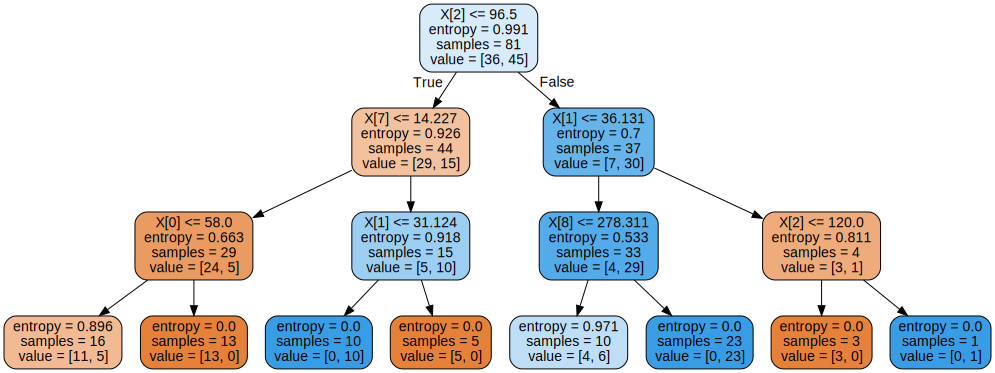

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(clasificador3,
                out_file="CancerMama.dot",
                filled=True,
                rounded=True)

Source.from_file( "CancerMama.dot")